# Gaussian Mixture

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = 'Smart_City_index_headers.csv'
data = pd.read_csv(file_path)

# Preprocess the data
features = data.drop(columns=['Id', 'City', 'Country'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


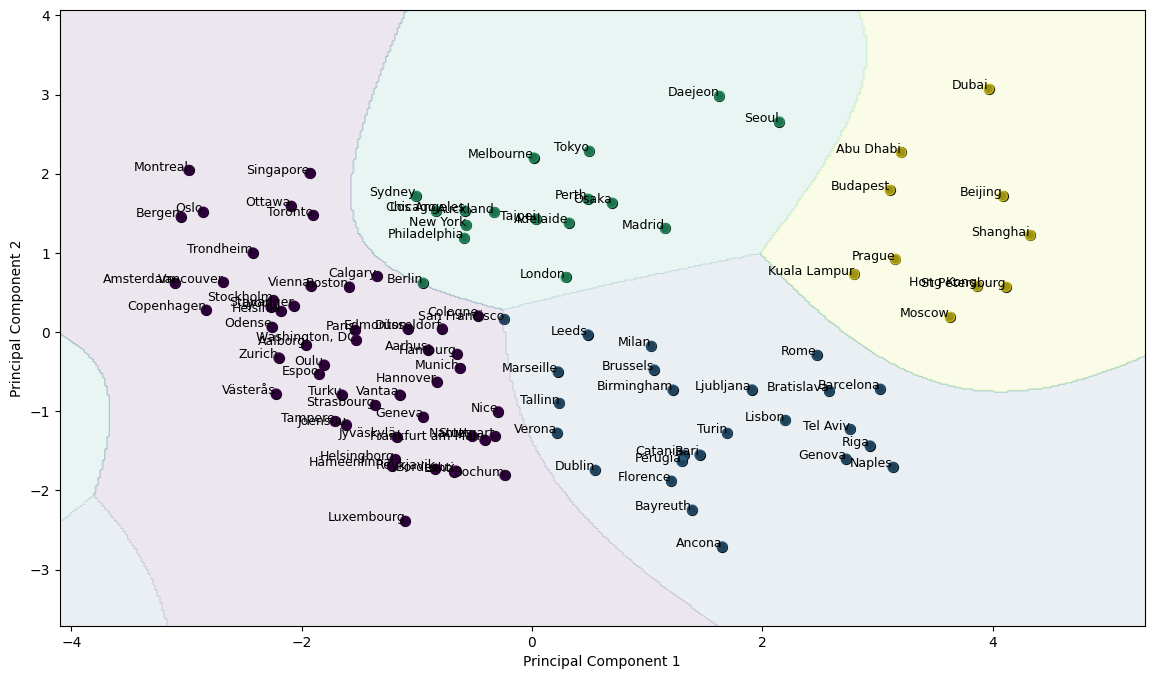

In [3]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(pca_result)


# Plot the GMM clusters with city names and cluster borders
plt.figure(figsize=(14, 8))

# Scatter plot with city names
for i in range(len(pca_result)):
    plt.scatter(pca_result[i, 0], pca_result[i, 1], c='black', s=50)
    plt.text(pca_result[i, 0], pca_result[i, 1], data['City'][i], fontsize=9, ha='right')

# Plot the GMM cluster borders
scatter_legend = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=gmm_clusters, cmap='viridis', s=50, alpha=0.6)
#plt.legend(*scatter_legend.legend_elements(), title="GMM Clusters")

# Draw cluster boundaries
x_min, x_max = pca_result[:, 0].min() - 1, pca_result[:, 0].max() + 1
y_min, y_max = pca_result[:, 1].min() - 1, pca_result[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.1, cmap='viridis')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('GMM Clusters of Smart Cities with City Names and Cluster Borders')
plt.savefig('gmm.pdf', dpi=1200)  # dpi=1200 for high resolution


In [4]:
# Add the GMM cluster labels to the original data
data['GMM_Cluster'] = gmm_clusters

# Group cities by their GMM clusters
gmm_clustered_cities = data.groupby('GMM_Cluster')['City'].apply(list)

# Print the cities in each GMM cluster
for cluster, cities in gmm_clustered_cities.items():
    print(f"GMM Cluster {cluster}:")
    for city in cities:
        print(f" - {city}")
    print("\n")


GMM Cluster 0:
 - Oslo
 - Bergen
 - Amsterdam
 - Copenhagen
 - Stockholm
 - Montreal
 - Vienna
 - Odense
 - Singapore
 - Boston
 - Zurich
 - Trondheim
 - Västerås
 - Aalborg
 - Ottawa
 - Washington, DC
 - Stavanger
 - Helsinki
 - Vancouver
 - Toronto
 - Düsseldorf
 - Reykjavik
 - Lyon
 - Helsingborg
 - Munich
 - Hamburg
 - Geneva
 - Luxembourg
 - Aarhus
 - Turku
 - Espoo
 - Paris
 - Hannover
 - Strasbourg
 - Joensuu
 - Frankfurt am Main
 - Oulu
 - Cologne
 - Bochum
 - Stuttgart
 - Hämeenlinna
 - Tampere
 - Jyväskylä
 - Vantaa
 - Bordeaux
 - Nantes
 - Lahti
 - Nice
 - Calgary
 - Edmonton


GMM Cluster 1:
 - San Francisco
 - Milan
 - Brussels
 - Marseille
 - Leeds
 - Dublin
 - Verona
 - Tallinn
 - Catania
 - Bayreuth
 - Turin
 - Florence
 - Birmingham
 - Bari
 - Bratislava
 - Ljubljana
 - Perugia
 - Tel Aviv
 - Barcelona
 - Ancona
 - Lisbon
 - Rome
 - Genova
 - Naples
 - Riga


GMM Cluster 2:
 - Los Angeles
 - Berlin
 - New York
 - Chicago
 - Taipei
 - Philadelphia
 - Sydney
 - London
 -

In [5]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture

# Assuming pca_result contains the PCA-transformed features and gmm_clusters contains the GMM cluster labels

# Silhouette Score
sil_score = silhouette_score(pca_result, gmm_clusters)

# Davies-Bouldin Index
db_index = davies_bouldin_score(pca_result, gmm_clusters)

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(pca_result, gmm_clusters)

print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_index}')


Silhouette Score: 0.401038884169688
Davies-Bouldin Index: 0.7513930223590725
Calinski-Harabasz Index: 87.14867820442242
